In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('Training_set_label.csv')

In [4]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [5]:
df.shape

(48260, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [7]:
df['Gender'].value_counts(dropna = False)

NaN    34361
M       7137
F       6762
Name: Gender, dtype: int64

In [8]:
df['Gender'].fillna('U', inplace = True)

In [9]:
for i in df.columns:
    print(i, df[i].nunique())

Agency 16
Agency Type 2
Distribution Channel 2
Product Name 26
Duration 442
Destination 141
Net Sales 1005
Commision (in value) 922
Gender 3
Age 88
Claim 2


In [10]:
df['Claim'].value_counts()

0    47552
1      708
Name: Claim, dtype: int64

<AxesSubplot:>

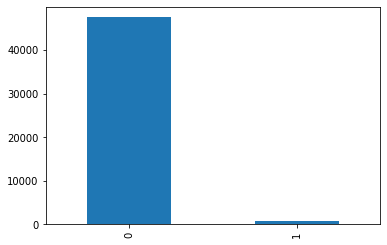

In [12]:
df['Claim'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

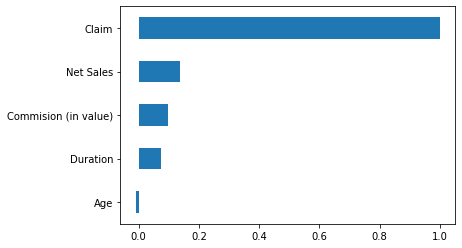

In [10]:
df.corr()['Claim'].sort_values().plot(kind = 'barh')

<AxesSubplot:>

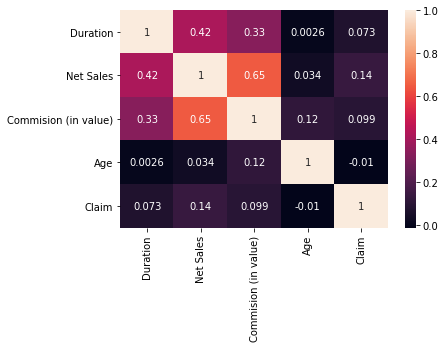

In [11]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

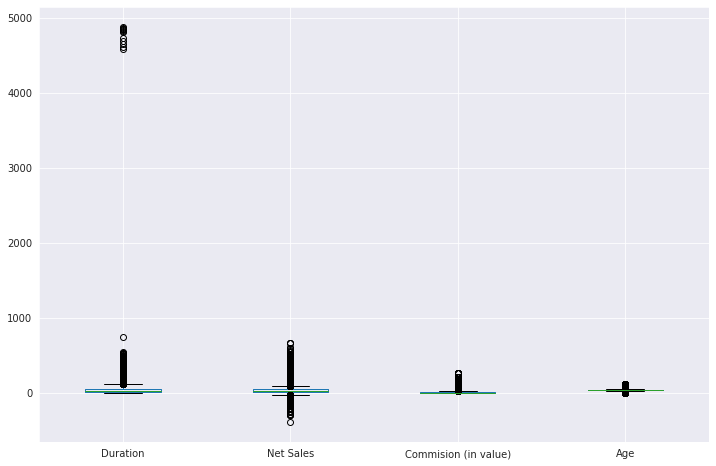

In [12]:
sns.set_style('darkgrid')
df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].plot.box(figsize = (12, 8))

<AxesSubplot:ylabel='Duration'>

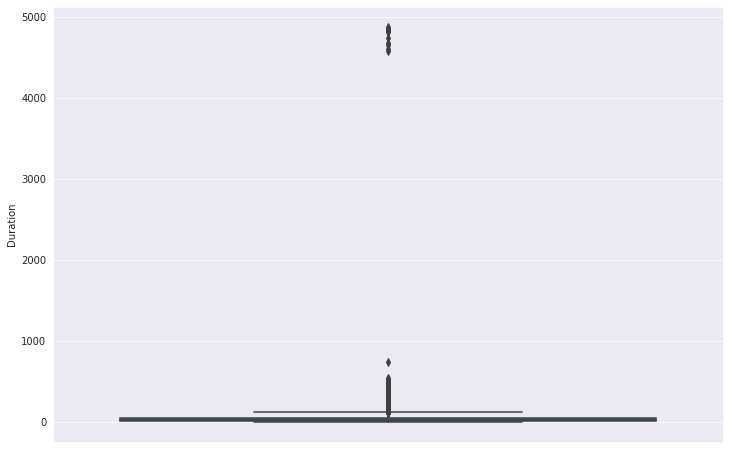

In [13]:
plt.figure(figsize = (12, 8))
sns.boxplot('Duration', data = df, orient = 'v')

<AxesSubplot:xlabel='Claim', ylabel='Duration'>

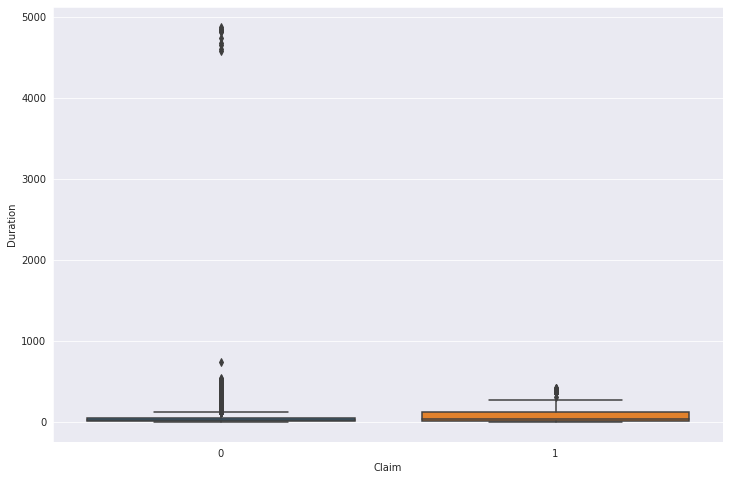

In [14]:
plt.figure(figsize = (12, 8))
sns.boxplot('Claim', 'Duration', data = df, orient = 'v')

In [15]:
df['Duration'].value_counts().sort_values(ascending = False).head(50)

5      1600
6      1564
7      1495
8      1485
4      1476
9      1379
10     1351
3      1269
11     1209
2      1159
12     1145
14     1003
13      999
16      939
15      913
17      848
18      807
19      788
20      705
22      695
21      688
23      612
1       611
24      596
25      574
27      554
26      529
28      527
29      508
30      491
34      487
32      453
35      451
31      449
33      429
36      407
39      402
40      376
38      371
37      358
41      325
42      314
45      311
43      303
48      299
365     295
47      290
46      289
49      265
44      258
Name: Duration, dtype: int64

In [16]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age', 'Claim'],
      dtype='object')

In [17]:
df.groupby('Agency Type').mean()['Duration']

Agency Type
Airlines         68.123660
Travel Agency    42.447662
Name: Duration, dtype: float64

<AxesSubplot:xlabel='Agency Type', ylabel='Duration'>

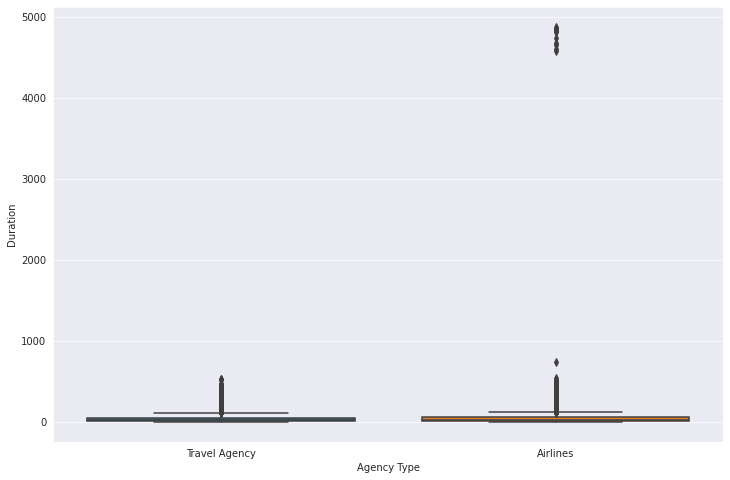

In [18]:
plt.figure(figsize = (12, 8))
sns.boxplot('Agency Type', 'Duration', data = df, orient = 'v')

In [19]:
df[df['Duration'] > 500]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
1466,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,U,48,0
4068,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.00,54.19,F,36,0
6761,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,U,48,0
16407,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,U,48,0
19777,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,U,48,0
21373,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,U,48,0
21404,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,U,48,0
23060,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,U,48,0
23442,C2B,Airlines,Online,Annual Silver Plan,545,SINGAPORE,161.00,40.25,M,40,0
23471,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,U,48,0


In [20]:
df[df['Destination'] == 'SINGAPORE'].head(20)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.50,13.63,M,24,0
12,EPX,Travel Agency,Online,Cancellation Plan,49,SINGAPORE,-80.00,0.00,U,21,0
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,52,1
28,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,193.20,48.30,F,76,0
38,EPX,Travel Agency,Online,Cancellation Plan,31,SINGAPORE,10.00,0.00,U,36,0
42,EPX,Travel Agency,Online,Cancellation Plan,5,SINGAPORE,10.00,0.00,U,36,0
43,EPX,Travel Agency,Online,Cancellation Plan,84,SINGAPORE,19.00,0.00,U,26,0
46,C2B,Airlines,Online,Bronze Plan,22,SINGAPORE,23.50,5.88,F,31,0
47,SSI,Airlines,Online,Ticket Protector,17,SINGAPORE,12.16,3.41,U,48,0
48,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,20.00,5.00,M,31,0


In [21]:
df.drop(df[df['Duration'] > 600].index, inplace = True)

In [22]:
df[df['Duration'] <= 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
86,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,3.99,1.12,U,48,0
1199,JWT,Airlines,Online,Value Plan,0,INDIA,31.00,12.40,M,118,0
1390,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,9.77,2.74,U,48,0
3239,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,UNITED STATES,9.90,5.94,U,59,0
3602,JZI,Airlines,Online,Basic Plan,0,THAILAND,18.00,6.30,U,118,0
3753,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.00,6.30,U,118,0
4341,JZI,Airlines,Online,Basic Plan,0,CHINA,22.00,7.70,M,34,0
8306,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,4.88,1.37,U,48,0
9705,JWT,Airlines,Online,Value Plan,0,INDIA,31.00,12.40,M,118,0
10516,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.00,6.30,U,118,0


In [23]:
from scipy.stats.mstats import winsorize

In [24]:
df['Duration'].describe()

count    48247.000000
mean        48.359753
std         73.825731
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max        545.000000
Name: Duration, dtype: float64

<AxesSubplot:ylabel='Duration'>

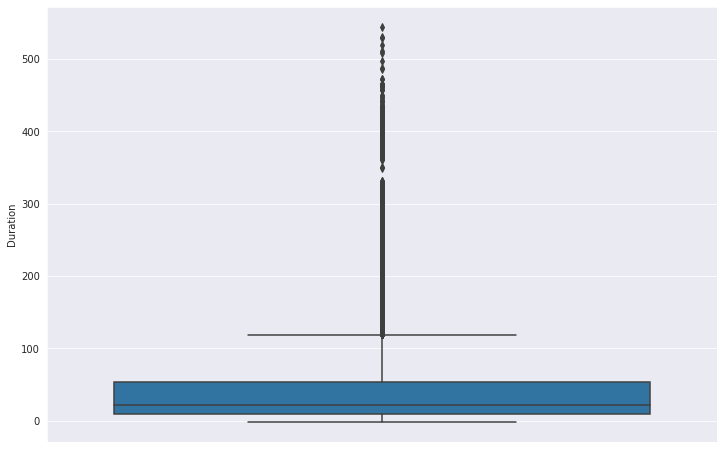

In [25]:
plt.figure(figsize = (12, 8))
sns.boxplot('Duration', data = df, orient = 'v')

In [26]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
outliers_15_low = (df['Duration'] < lower_lim)
outliers_15_up = (df['Duration'] > upper_lim)

In [27]:
df['Duration'][(outliers_15_low | outliers_15_up)]

20       365
28       382
36       183
41       192
80       149
        ... 
48192    422
48214    389
48220    374
48228    201
48240    365
Name: Duration, Length: 4227, dtype: int64

In [28]:
upper_lim

119.0

In [29]:
lower_lim

-57.0

In [30]:
df[['Duration']].describe()

,Duration
count,48247.000000
mean,48.359753
std,73.825731
min,-2.000000
25%,9.000000
50%,22.000000
75%,53.000000
max,545.000000


In [31]:
df['Duration'].quantile(0.01)

1.0

In [32]:
df['Duration'].quantile(0.9998)

472.0

In [33]:
df['Duration']

0        61
1        93
2        22
3        14
4        90
         ..
48255    39
48256    20
48257    19
48258     7
48259    35
Name: Duration, Length: 48247, dtype: int64

In [34]:
pd.DataFrame(winsorize(df['Duration'], (0.01, 0.0002)))

,0
0,61
1,93
2,22
3,14
4,90
...,...
48242,39
48243,20
48244,19
48245,7


In [35]:
df = df.reset_index(drop=True)

In [36]:
df['Duration']

0        61
1        93
2        22
3        14
4        90
         ..
48242    39
48243    20
48244    19
48245     7
48246    35
Name: Duration, Length: 48247, dtype: int64

In [37]:
df['Duration'] = pd.DataFrame(winsorize(df['Duration'], (0.01, 0.0002)))

In [38]:
df['Duration'].describe()

count    48247.000000
mean        48.353286
std         73.778627
min          1.000000
25%          9.000000
50%         22.000000
75%         53.000000
max        472.000000
Name: Duration, dtype: float64

<AxesSubplot:ylabel='Net Sales'>

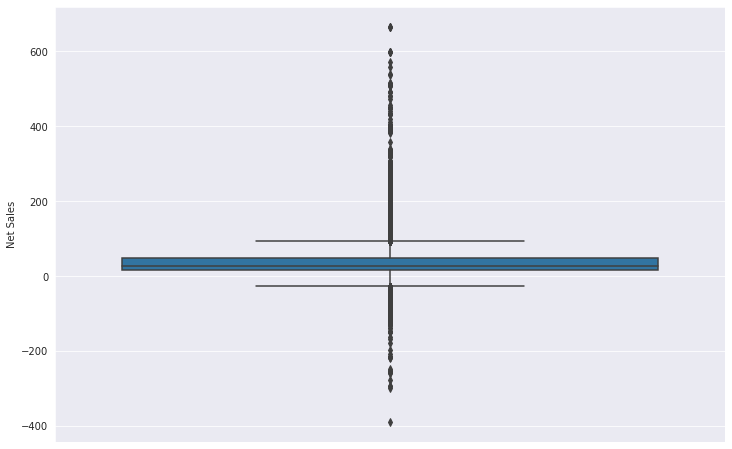

In [39]:
plt.figure(figsize = (12, 8))
sns.boxplot('Net Sales', data = df, orient = 'v')

In [40]:
df[df['Net Sales'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
12,EPX,Travel Agency,Online,Cancellation Plan,49,SINGAPORE,-80.0,0.00,U,21,0
183,EPX,Travel Agency,Online,2 way Comprehensive Plan,211,JAPAN,-51.0,0.00,U,36,0
422,KML,Travel Agency,Online,Premier Plan,53,NORWAY,-130.0,49.40,F,48,0
486,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,156,MALAYSIA,-19.8,11.88,U,50,0
540,EPX,Travel Agency,Online,Cancellation Plan,113,CHINA,-15.0,0.00,U,36,0
...,...,...,...,...,...,...,...,...,...,...,...
47860,EPX,Travel Agency,Online,2 way Comprehensive Plan,318,PHILIPPINES,-34.0,0.00,U,36,0
47900,EPX,Travel Agency,Online,Cancellation Plan,15,CHINA,-53.0,0.00,U,36,0
47964,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,8,MALAYSIA,-19.8,11.88,U,31,0
48056,EPX,Travel Agency,Online,2 way Comprehensive Plan,50,"TAIWAN, PROVINCE OF CHINA",-50.0,0.00,U,49,0


In [41]:
Q1 = df['Net Sales'].quantile(0.25)
Q3 = df['Net Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
outliers_15_low = (df['Net Sales'] < lower_lim)
outliers_15_up = (df['Net Sales'] > upper_lim)
df['Net Sales'][(outliers_15_low | outliers_15_up)]

12       -80.00
20       252.85
28       193.20
41        99.00
56       112.00
          ...  
48207    259.20
48213    112.00
48227    216.00
48232    124.00
48240    108.90
Name: Net Sales, Length: 4219, dtype: float64

In [42]:
df.drop(df[df['Net Sales'] < 0].index, inplace = True)

<AxesSubplot:ylabel='Net Sales'>

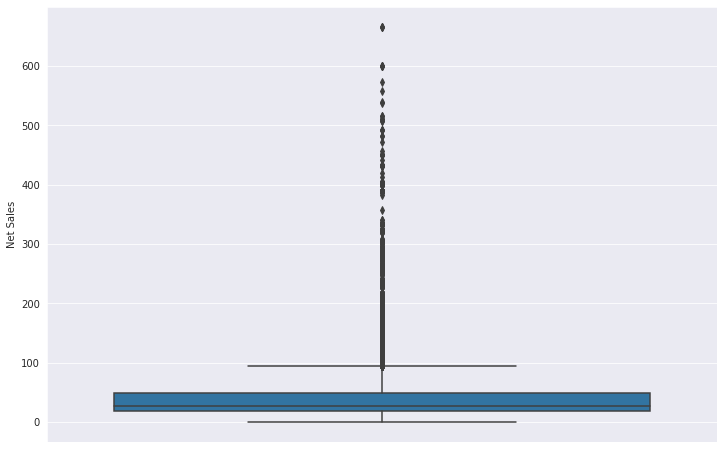

In [43]:
plt.figure(figsize = (12, 8))
sns.boxplot('Net Sales', data = df, orient = 'v')

In [44]:
Q1 = df['Net Sales'].quantile(0.25)
Q3 = df['Net Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
outliers_15_low = (df['Net Sales'] < lower_lim)
outliers_15_up = (df['Net Sales'] > upper_lim)
df['Net Sales'][(outliers_15_low | outliers_15_up)]

20       252.85
28       193.20
41        99.00
56       112.00
59       128.70
          ...  
48207    259.20
48213    112.00
48227    216.00
48232    124.00
48240    108.90
Name: Net Sales, Length: 3782, dtype: float64

<AxesSubplot:ylabel='Commision (in value)'>

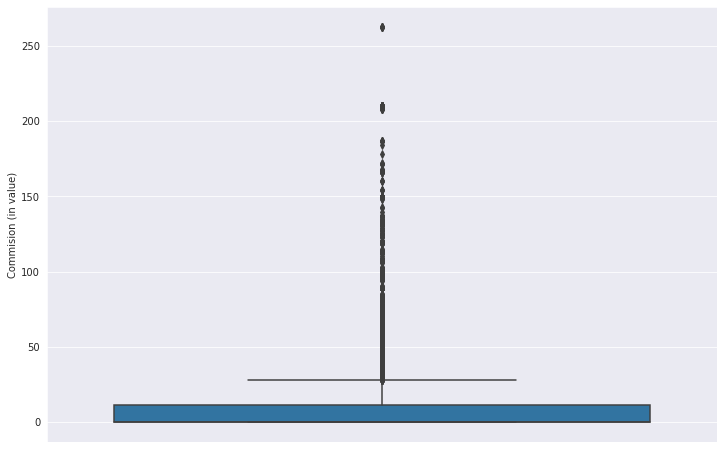

In [45]:
plt.figure(figsize = (12, 8))
sns.boxplot('Commision (in value)', data = df, orient = 'v')

In [46]:
Q1 = df['Commision (in value)'].quantile(0.25)
Q3 = df['Commision (in value)'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
outliers_15_low = (df['Commision (in value)'] < lower_lim)
outliers_15_up = (df['Commision (in value)'] > upper_lim)
df['Commision (in value)'][(outliers_15_low | outliers_15_up)]

20       63.21
28       48.30
30       29.70
33       29.70
41       59.40
         ...  
48202    38.50
48207    64.80
48227    54.00
48232    49.60
48240    65.34
Name: Commision (in value), Length: 5268, dtype: float64

In [47]:
df = df.reset_index(drop=True)

In [48]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,47725.000000,47725.000000,47725.000000,47725.000000,47725.000000
mean,47.975904,41.853994,9.660533,39.919958,0.014814
std,73.581076,47.664585,19.563150,14.015076,0.120809
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,18.500000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,52.000000,49.000000,11.130000,43.000000,0.000000
max,472.000000,666.000000,262.760000,118.000000,1.000000


In [49]:
for i in df.columns:
    print(i, df[i].nunique())

Agency 16
Agency Type 2
Distribution Channel 2
Product Name 26
Duration 416
Destination 140
Net Sales 884
Commision (in value) 919
Gender 3
Age 88
Claim 2


In [50]:
df_2 = pd.get_dummies(df, drop_first=True)

<AxesSubplot:>

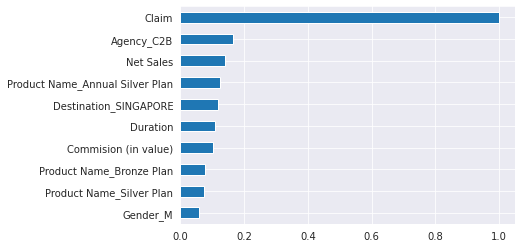

In [51]:
df_2.corr()["Claim"].sort_values().tail(10).plot.barh()

<AxesSubplot:>

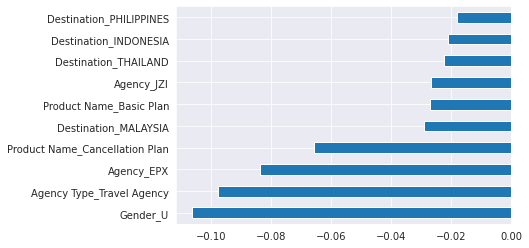

In [52]:
df_2.corr()["Claim"].sort_values().head(10).plot.barh()

In [53]:
df['Claim'].value_counts()

0    47018
1      707
Name: Claim, dtype: int64

In [54]:
df[df['Agency'] == 'C2B']['Claim'].value_counts()

0    5827
1     415
Name: Claim, dtype: int64

In [55]:
df[df['Destination'] == 'SINGAPORE']['Claim'].value_counts()

0    9570
1     426
Name: Claim, dtype: int64

In [56]:
df.drop(['Gender', 'Distribution Channel', 'Agency Type', 'Destination'], axis = 1, inplace = True)

In [57]:
df = pd.get_dummies(df, drop_first=True)

<AxesSubplot:>

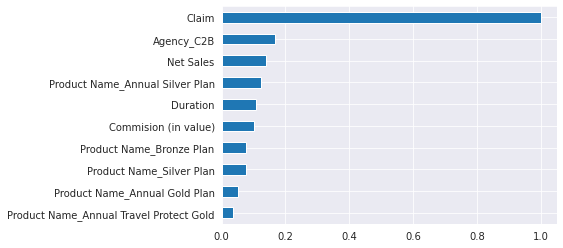

In [58]:
df.corr()["Claim"].sort_values().tail(10).plot.barh()

<AxesSubplot:>

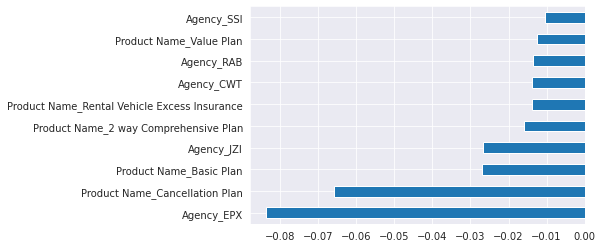

In [59]:
df.corr()["Claim"].sort_values().head(10).plot.barh()

In [60]:
df.shape

(47725, 45)

In [61]:
df.isnull().sum().any()

False

# Split Data

In [62]:
X = df.drop('Claim', axis = 1)
y = df['Claim']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression().fit(X_train, y_train)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, f1_score

In [69]:
print(confusion_matrix(y_test, y_pred))

[[9404    0]
 [ 141    0]]


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9404
           1       0.00      0.00      0.00       141

    accuracy                           0.99      9545
   macro avg       0.49      0.50      0.50      9545
weighted avg       0.97      0.99      0.98      9545



/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


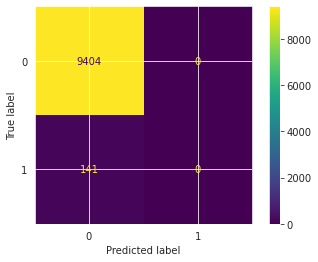

In [71]:
plot_confusion_matrix(model, X_test, y_test)

In [72]:
y.value_counts()

0    47018
1      707
Name: Claim, dtype: int64

### with scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [75]:
model = LogisticRegression().fit(X_train_sc, y_train)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
y_pred = model.predict(X_test_sc)

In [77]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[9404    0]
 [ 141    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9404
           1       0.00      0.00      0.00       141

    accuracy                           0.99      9545
   macro avg       0.49      0.50      0.50      9545
weighted avg       0.97      0.99      0.98      9545



/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE

In [78]:
X = df.drop('Claim', axis = 1)
y = df['Claim']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

In [80]:
from collections import Counter

In [81]:
counter = Counter(y_train)
print(counter)

Counter({0: 37614, 1: 566})


### oversampling

In [82]:
from imblearn.over_sampling import SMOTE       #over sampling of minority class in imbalanced data
# from imblearn.combine import SMOTEENN          #over sampling of minority class in imbalanced data

In [83]:
oversample = SMOTE()                      # transform the dataset
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [84]:
counter = Counter(y_smote)
print(counter)

Counter({1: 37614, 0: 37614})


### LogReg

In [85]:
model = LogisticRegression().fit(X_smote, y_smote)

y_pred = model.predict(X_test)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [86]:
print(confusion_matrix(y_test, y_pred))

[[7401 2003]
 [  52   89]]


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      9404
           1       0.04      0.63      0.08       141

    accuracy                           0.78      9545
   macro avg       0.52      0.71      0.48      9545
weighted avg       0.98      0.78      0.87      9545



In [88]:
print(f1_score(y_test, y_pred))

0.07971339005821765


### wtih scaling

In [89]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_smote)
X_test_sc = sc.transform(X_test)

model = LogisticRegression().fit(X_train_sc, y_smote)

y_pred = model.predict(X_test_sc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[7902 1502]
 [  54   87]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      9404
           1       0.05      0.62      0.10       141

    accuracy                           0.84      9545
   macro avg       0.52      0.73      0.51      9545
weighted avg       0.98      0.84      0.90      9545

0.10057803468208092


/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### undersampling

In [90]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

In [91]:
counter = Counter(y_train)
print(counter)

Counter({0: 37614, 1: 566})


In [92]:
from imblearn.under_sampling import RandomUnderSampler

In [93]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [94]:
from imblearn.pipeline import Pipeline

In [95]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [96]:
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

In [97]:
counter = Counter(y_smote)
print(counter)

Counter({0: 7522, 1: 3761})


#### undersampling without scaled

In [98]:
model = LogisticRegression().fit(X_smote, y_smote)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[8344 1060]
 [  71   70]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9404
           1       0.06      0.50      0.11       141

    accuracy                           0.88      9545
   macro avg       0.53      0.69      0.52      9545
weighted avg       0.98      0.88      0.92      9545

0.1101494885916601


/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### undersampling with scaling

In [99]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_smote)
X_test_sc = sc.transform(X_test)

model = LogisticRegression().fit(X_train_sc, y_smote)

y_pred = model.predict(X_test_sc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[8822  582]
 [  87   54]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      9404
           1       0.08      0.38      0.14       141

    accuracy                           0.93      9545
   macro avg       0.54      0.66      0.55      9545
weighted avg       0.98      0.93      0.95      9545

0.138996138996139


/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Decision Tree

#### oversampling

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)
oversample = SMOTE()                     
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [102]:
dt_model = DecisionTreeClassifier().fit(X_smote, y_smote)

y_pred = dt_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[9022  382]
 [ 125   16]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9404
           1       0.04      0.11      0.06       141

    accuracy                           0.95      9545
   macro avg       0.51      0.54      0.52      9545
weighted avg       0.97      0.95      0.96      9545

0.05936920222634508


#### undersampling

In [103]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({0: 7522, 1: 3761})


In [104]:
dt_model = DecisionTreeClassifier().fit(X_smote, y_smote)

y_pred = dt_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[8564  840]
 [  98   43]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9404
           1       0.05      0.30      0.08       141

    accuracy                           0.90      9545
   macro avg       0.52      0.61      0.52      9545
weighted avg       0.97      0.90      0.94      9545

0.083984375


# Random Forest

#### oversampling

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)
oversample = SMOTE()                     
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [107]:
rf_model = RandomForestClassifier().fit(X_smote, y_smote)

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[9053  351]
 [ 123   18]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9404
           1       0.05      0.13      0.07       141

    accuracy                           0.95      9545
   macro avg       0.52      0.55      0.52      9545
weighted avg       0.97      0.95      0.96      9545

0.07058823529411765


#### undersampling

In [108]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({0: 7522, 1: 3761})


In [109]:
rf_model = RandomForestClassifier().fit(X_smote, y_smote)

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[8794  610]
 [ 101   40]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      9404
           1       0.06      0.28      0.10       141

    accuracy                           0.93      9545
   macro avg       0.53      0.61      0.53      9545
weighted avg       0.97      0.93      0.95      9545

0.10113780025284451


# KNN

#### oversampling and scaled

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)
oversample = SMOTE()                     
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_smote)
X_test_sc = sc.transform(X_test)

In [112]:
knn_model = KNeighborsClassifier().fit(X_train_sc, y_smote)

y_pred = knn_model.predict(X_test_sc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[8568  836]
 [ 100   41]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9404
           1       0.05      0.29      0.08       141

    accuracy                           0.90      9545
   macro avg       0.52      0.60      0.51      9545
weighted avg       0.97      0.90      0.94      9545

0.08055009823182711


#### undersampling and scaled

In [113]:
X = df.drop('Claim', axis = 1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({0: 7522, 1: 3761})


In [114]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_smote)
X_test_sc = sc.transform(X_test)

In [115]:
knn_model = KNeighborsClassifier().fit(X_train_sc, y_smote)

y_pred = knn_model.predict(X_test_sc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[8380 1024]
 [  83   58]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9404
           1       0.05      0.41      0.09       141

    accuracy                           0.88      9545
   macro avg       0.52      0.65      0.52      9545
weighted avg       0.98      0.88      0.93      9545

0.09484873262469337


##### We got best result with scaled and undersampled data. With LogReg.

## Test Data part

In [116]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [117]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [118]:
test_data.shape

(15832, 10)

In [119]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [120]:
test_data.drop(['Gender', 'Distribution Channel', 'Agency Type', 'Destination'], axis = 1, inplace = True)

In [121]:
df2 = pd.get_dummies(test_data, drop_first=True)

In [122]:
df2.shape

(15832, 43)

In [128]:
X_train, X_test = train_test_split(df2, test_size=0.20, random_state=101)